In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [38]:
train=pd.read_csv("titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


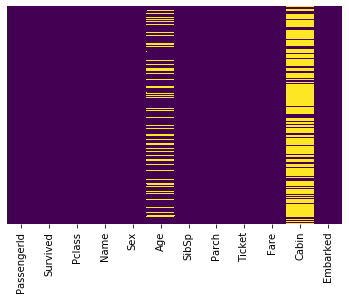

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

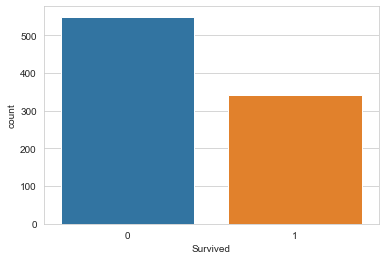

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

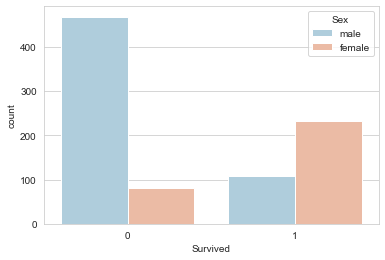

In [7]:
sns.countplot(x='Survived',data=train,hue="Sex",palette="RdBu_r")

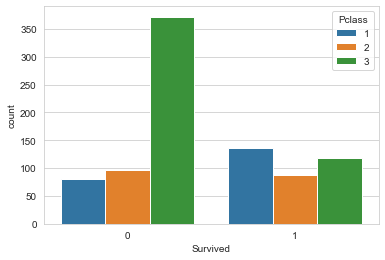

In [8]:
sns.countplot(x='Survived',data=train,hue="Pclass")

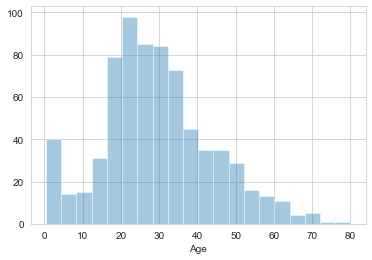

In [9]:
sns.distplot(train['Age'].dropna(),kde=False)

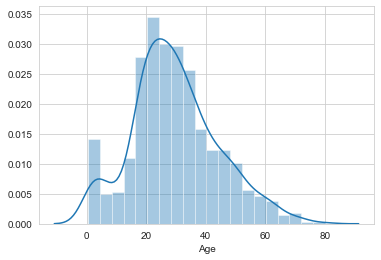

In [10]:
sns.distplot(train['Age'])

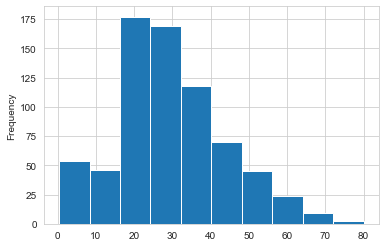

In [11]:
train['Age'].plot.hist()

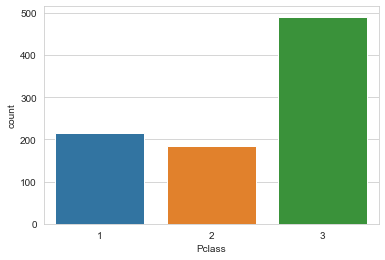

In [12]:
sns.countplot(x='Pclass',data=train)

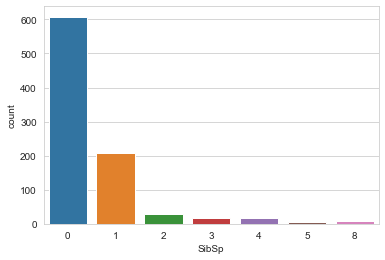

In [13]:
sns.countplot(x='SibSp',data=train)

In [14]:
import cufflinks as cf
cf.go_offline()

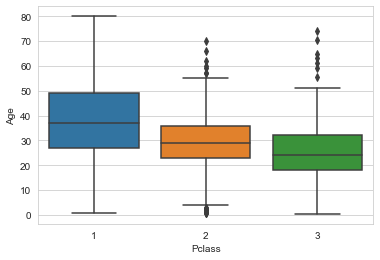

In [15]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [39]:
def immyte(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass ==2:
            return 29
        else :
            return 24
    else :
        return age
    

In [40]:
train['Age']=train[['Age','Pclass']].apply(immyte,axis=1)

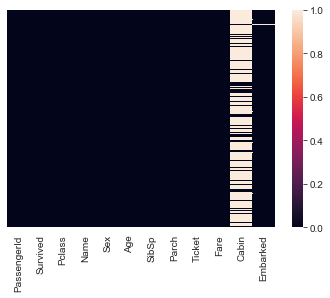

In [41]:
sns.heatmap(train.isnull(),yticklabels=False)

In [26]:
train.drop('Cabin',axis=1,inplace=True)

In [30]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [43]:
train_m=pd.concat([train,sex,embarked],axis=1)

In [44]:
train_m

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [47]:
train_m.drop('Embarked',axis=1,inplace=True)

In [48]:
train_m.drop('Cabin',axis=1,inplace=True)

In [50]:
train_m.drop('Ticket',axis=1,inplace=True)

In [51]:
train_m.drop('PassengerId',axis=1,inplace=True)

In [52]:
train_m.drop('Name',axis=1,inplace=True)
train_m.drop('Sex',axis=1,inplace=True)

In [55]:
from sklearn.model_selection import train_test_split

In [64]:
y=train['PassengerId']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(train_m,y,test_size=0.3,random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression


In [68]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
predictions=lr.predict(x_test)

In [70]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          34       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       1.0
          41       0.00    

C:\ana\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ana\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

